Calcular diagramas de radiación de un array de antenas

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import sympy as sp
import numpy as np
import cmath
N,k,l,d,r= sp.symbols ('N,k,l,d,r', real=True)


In [30]:
def CampoRadiacionS (longitudOnda,desfase,theta,N):
    k=2*sp.pi/longitudOnda
    phi=k*d*sp.cos(theta)+desfase
    E=sp.exp(-1j(k*r))*60j*(sp.cos(k*l*sp.cos(theta))-sp.cos(k*l))/(sp.sin(theta)*r)
    AF=sp.sin(N*phi/2)/sp.sin(phi/2)
    Erad=sp.re(E*AF)
    return Erad

In [31]:
CampoRadiacionS (1,1,1,1)

TypeError: 'complex' object is not callable

In [44]:
def CampoRadiacionN (frecuencia,desfase,theta,N1,h,x):
    lambda4=3*10**8/frecuencia
    longitud=lambda4/h
    d1=longitud/2
    k1=2*np.pi/lambda4
    phi=k1*d1*np.cos(theta)+desfase
    E=np.exp(-1j*(k1*x))*60j*(np.cos(k1*longitud/2*np.cos(theta))-np.cos(k1*longitud/2))/(np.sin(theta)*x)
    AF=np.sin(N1*phi/2)/np.sin(phi/2)
    Erad=np.real(E*AF)
    return Erad

/home/power/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


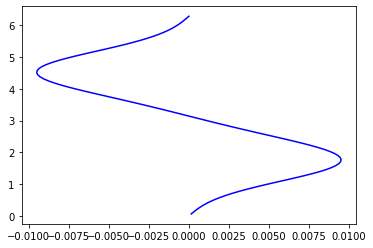

In [60]:
lambda4=3*10**8/10**8
longitud=lambda4/2
d1=longitud/2
k1=2*np.pi/lambda4
phi=k1*d1*np.cos(theta)+1
E=np.exp(-1j*(k1*10000))*60j*(np.cos(k1*longitud/2*np.cos(theta))-np.cos(k1*longitud/2))/(np.sin(theta)*10000)
AF=np.sin(2*phi/2)/np.sin(phi/2)
Erad=np.real(E*AF)
theta= np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(Erad, theta, color="blue", label="y(x)")

In [45]:
CampoRadiacionN(10**8,1,1,2,2,10000)

0.004916942142252499

In [58]:
theta= np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, th, color="blue", label="y(x)")

In [ ]:
def ArrayFactor(ElementArray, Freq):
    """
    Summation of field contributions from each element in array, at frequency freq at theta 0°-95°, phi 0°-360°.
    Element = xPos, yPos, zPos, ElementAmplitude, ElementPhaseWeight
    Returns arrayFactor[theta, phi, elementSum]
    """

    arrayFactor = np.ones((360, 95))

    Lambda = 3e8 / Freq

    for theta in range(95):
        for phi in range(360):                                                                                                      # For all theta/phi positions
            elementSum = 1e-9 + 0j

            for element in ElementArray:                                                                                            # Summation of each elements contribution at theta/phi position.
                relativePhase = CalculateRelativePhase(element, Lambda, math.radians(theta), math.radians(phi))                     # Find relative phase for current element
                elementSum += element[3] * math.e ** ((relativePhase + element[4]) * 1j)                                            # Element contribution = Amp * e^j(Phase + Phase Weight)

            arrayFactor[phi][theta] = elementSum.real

    return arrayFactor

  
def CalculateRelativePhase(Element, Lambda, theta, phi):
    """
    Incident wave treated as plane wave. Phase at element is referred to phase of plane wave at origin.
    Element = xPos, yPos, zPos, ElementAmplitude, ElementPhaseWeight
    theta & phi in radians
    See Eqn 3.1 @ https://theses.lib.vt.edu/theses/available/etd-04262000-15330030/unrestricted/ch3.pdf
    """
    phaseConstant = (2 * math.pi / Lambda)

    xVector = Element[0] * math.sin(theta) * math.cos(phi)
    yVector = Element[1] * math.sin(theta) * math.sin(phi)
    zVector = Element[2] * math.cos(theta)

    phaseOfIncidentWaveAtElement = phaseConstant * (xVector + yVector + zVector)  # kr

    return phaseOfIncidentWaveAtElement

In [74]:
import math
lambda4=3*10**8/10**8
longitud=lambda4/2
d1=longitud/2
k1=2*np.pi/lambda4
arrayErad = np.ones((180, 1000))
for r in range(1000):
    for theta in range(180):
        phi=k1*d1*np.cos(math.radians(theta))+1
        E=np.exp(-1j*(k1*r))*60j*(np.cos(k1*longitud/2*np.cos(math.radians(theta)))-np.cos(k1*longitud/2))/(np.sin(math.radians(theta))*r)
        AF=np.sin(2*phi/2)/np.sin(phi/2)
        Erad=np.real(E*AF)
        arrayErad[r][theta]=Erad

/home/power/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/power/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in cdouble_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/power/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in cdouble_scalars
  if sys.path[0] == '':


IndexError: index 180 is out of bounds for axis 0 with size 180

In [73]:
arrayErad = np.ones((3, 4))
arrayErad

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])